In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#list the number of files in the directory
import os

for dirpath, dirnames, filenames in os.walk("..\\CNN\\Data\\pizza_steak"):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "..\CNN\Data\pizza_steak".
There are 2 directories and 0 images in "..\CNN\Data\pizza_steak\test".
There are 0 directories and 250 images in "..\CNN\Data\pizza_steak\test\pizza".
There are 0 directories and 250 images in "..\CNN\Data\pizza_steak\test\steak".
There are 2 directories and 0 images in "..\CNN\Data\pizza_steak\train".
There are 0 directories and 750 images in "..\CNN\Data\pizza_steak\train\pizza".
There are 0 directories and 750 images in "..\CNN\Data\pizza_steak\train\steak".


In [3]:
# Another way to find out how many images are ina file
num_steak_images_train = len(os.listdir("..\\CNN\\Data\\pizza_steak\\train\\steak"))
num_steak_images_train

750

In [4]:
# Get the class names programmatically
import pathlib
data_dir = pathlib.Path("..\\CNN\\Data\\pizza_steak\\train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [5]:
# Visualize our image
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_images = random.sample(os.listdir(target_folder), 1)
    print(random_images)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "\\" + random_images[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}') # Show the shape of the image

    return img

['331860.jpg']
Image shape: (382, 512, 3)


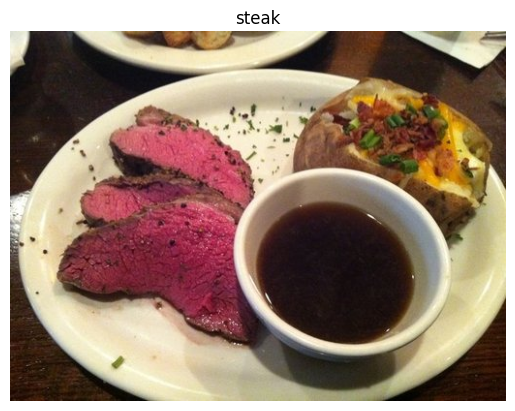

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="..\\CNN\\Data\\pizza_steak\\train\\",
                       target_class='steak')

In [7]:
img.shape

(382, 512, 3)

🔑**Note**: Many machine learning models. including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize) thier pixel values by dividing the image arrays by 255 (since 255 is maximum pixel value).

In [8]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.86666667, 0.87843137, 0.84313725],
        [0.8627451 , 0.8745098 , 0.83921569],
        [0.87058824, 0.88235294, 0.83921569],
        ...,
        [0.62745098, 0.61960784, 0.52156863],
        [0.58823529, 0.58039216, 0.49019608],
        [0.55294118, 0.54509804, 0.45490196]],

       [[0.8745098 , 0.88627451, 0.85098039],
        [0.86666667, 0.87843137, 0.84313725],
        [0.86666667, 0.87843137, 0.83529412],
        ...,
        [0.35686275, 0.34901961, 0.25882353],
        [0.3372549 , 0.32941176, 0.23921569],
        [0.32156863, 0.31372549, 0.23137255]],

       [[0.87843137, 0.89019608, 0.84705882],
        [0.8627451 , 0.8745098 , 0.83137255],
        [0.85882353, 0.87058824, 0.82745098],
        ...,
        [0.44705882, 0.42745098, 0.34901961],
        [0.47058824, 0.45098039, 0.37647059],
        [0.48627451, 0.46666667, 0.39215686]],

       ...,

       [[0.1372549 , 0.05098039, 0.00784314],
        [0.09803922, 0.01176471, 0.        ],
        [0.12156863, 0

### 1. Become one with the data

['358042.jpg']
Image shape: (384, 512, 3)
['2361973.jpg']
Image shape: (384, 512, 3)


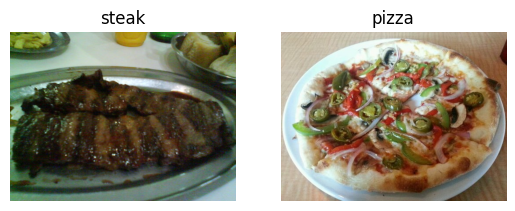

In [9]:
# Visualize
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("../CNN/Data/pizza_steak/train/", 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image("../CNN/Data/pizza_steak/train/", 'pizza')

### 2. Preprocess the data (prepare it for model)

In [10]:
# Define the directory dataset paths
train_dir = "..\\CNN\\Data\\pizza_steak\\train\\"
test_dir = "..\\CNN\\Data\\pizza_steak\\test"

>Our next step is to turn our data into **batches**

>A batch is a small subset of data. Rather than look at all 1500 trainable images at one time, a model might only look at 32 at a time.

>It does this for a couple of reasons:
>* 1500 images (or more) might not fit into the memory of your processor(GPU)
>* Trying to learn the patterns in 1500 images onone hit could result in the model not being able to learn very well.

In [11]:
# Create train and test data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [12]:
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                              target_size=(224, 224), # Target size of images (height, width)
                                              class_mode = 'binary', # Type of data you're working with
                                              batch_size = 32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
images, labels = train_data.next() # Get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [14]:
# How many batches are there?
len(train_data)

47

In [15]:
1500/32 # Total images divided by batch size

46.875

In [16]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.16862746, 0.05490196, 0.02352941],
          [0.18039216, 0.07843138, 0.01960784],
          [0.18823531, 0.10196079, 0.00784314],
          ...,
          [0.3019608 , 0.11764707, 0.01568628],
          [0.32156864, 0.1254902 , 0.01960784],
          [0.3019608 , 0.10588236, 0.        ]],
 
         [[0.1764706 , 0.05882353, 0.01568628],
          [0.18039216, 0.07450981, 0.00784314],
          [0.20392159, 0.10980393, 0.00784314],
          ...,
          [0.3137255 , 0.11764707, 0.01960784],
          [0.32156864, 0.12156864, 0.01568628],
          [0.31764707, 0.11764707, 0.01176471]],
 
         [[0.20392159, 0.07450981, 0.00784314],
          [0.23529413, 0.1137255 , 0.03137255],
          [0.2509804 , 0.14901961, 0.04313726],
          ...,
          [0.3254902 , 0.12156864, 0.02745098],
          [0.32156864, 0.10980393, 0.00784314],
          [0.3254902 , 0.10588236, 0.00784314]],
 
         ...,
 
         [[0.1764706 , 0.14117648, 0.01176471],
          [0.17647

In [17]:
# View the first batch of labels
labels

array([0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a base line)

>A Baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [19]:
model_1 = Sequential([
    Conv2D(filters=10, # Filter is the number of sliding windows going across an input (higher = more complex model)
          kernel_size=3, #The size of the sliding window going across an input
          activation='relu',
          input_shape=(224, 224, 3)), # input layer (specify input shape)
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [20]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)        0

In [22]:
len(train_data), len(test_data)

(47, 16)

In [23]:
# Fit the model
history_1 = model_1.fit(train_data, #This is the combination of labels and sample data
                       epochs = 10,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps= len(test_data))

Epoch 1/10
47/47 [==============================] - 22s 441ms/step - loss: 0.6175 - accuracy: 0.6453 - val_loss: 0.4554 - val_accuracy: 0.8160
Epoch 2/10
47/47 [==============================] - 24s 513ms/step - loss: 0.4662 - accuracy: 0.7780 - val_loss: 0.3702 - val_accuracy: 0.8320
Epoch 3/10
47/47 [==============================] - 23s 490ms/step - loss: 0.4009 - accuracy: 0.8200 - val_loss: 0.3486 - val_accuracy: 0.8500
Epoch 4/10
47/47 [==============================] - 24s 517ms/step - loss: 0.3992 - accuracy: 0.8253 - val_loss: 0.4195 - val_accuracy: 0.7980
Epoch 5/10
47/47 [==============================] - 25s 529ms/step - loss: 0.3699 - accuracy: 0.8473 - val_loss: 0.3407 - val_accuracy: 0.8460
Epoch 6/10
47/47 [==============================] - 25s 534ms/step - loss: 0.3262 - accuracy: 0.8687 - val_loss: 0.3507 - val_accuracy: 0.8260
Epoch 7/10
47/47 [==============================] - 26s 561ms/step - loss: 0.3037 - accuracy: 0.8813 - val_loss: 0.3153 - val_accuracy: 0.8620

### 5. Evaluate the model
it looks like our model is learning something, let's evaluate it

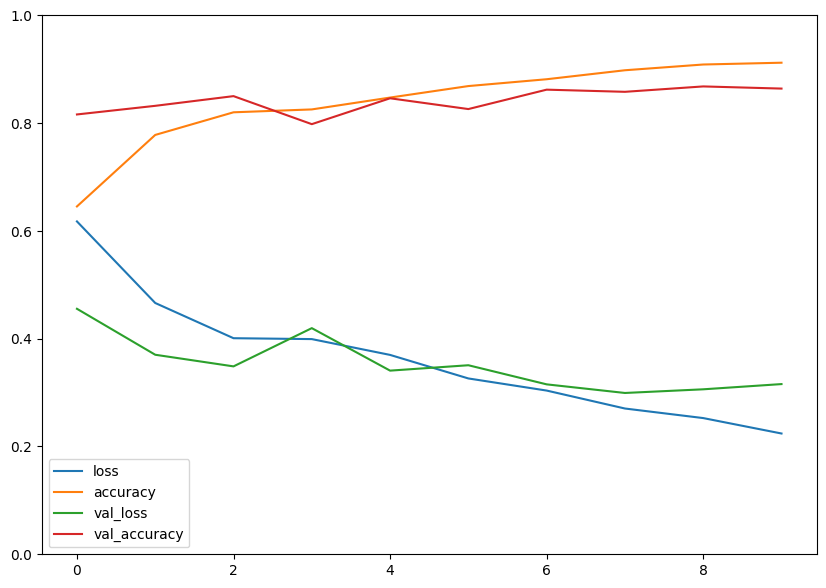

In [24]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7))
plt.ylim(0,1)
plt.show()

In [25]:
# plot the validation and training curves separatly
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    #plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

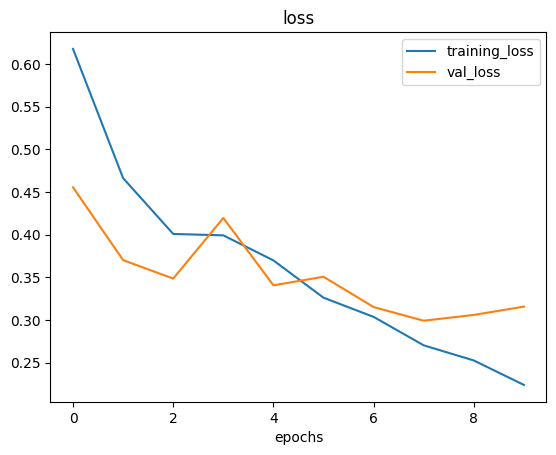

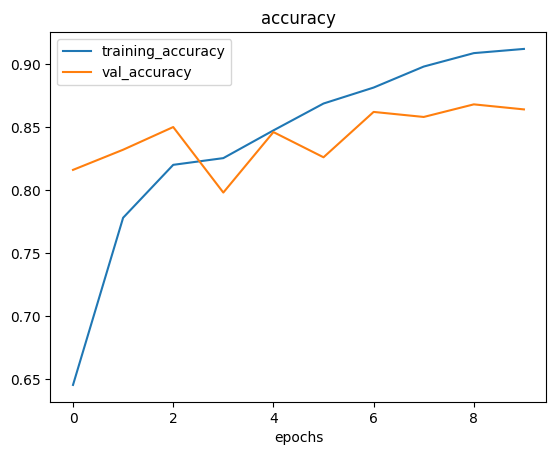

In [26]:
# Check out the loss and accuracy curve
plot_loss_curves(history_1)

The ideal position for these two curves is to follow each other. if anything, the validation curve should be slightly under the training curve. if there's large gap between the training curve and validation curve, it means your model is probably overfitting

### Opening our bag of tricks and finding data augmentation

In [27]:
# Create ImageImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                            rotation_range=0.2, # How much do you want to rotate an image
                                            shear_range=0.2,
                                            width_shift_range=0.2, # Move your image around x-axis
                                            height_shift_range=0.3, # Move your image around y-axis
                                            horizontal_flip=True)

# Create ImageDaImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDaImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar

In [28]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=True)

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


##### Let's visualize some augmented data!!!

In [29]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: label's aren't augmented only images

In [30]:
model_2 = Sequential([
    Conv2D(50, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(50, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(50, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history_2 = model_2.fit(train_data_augmented,
                       epochs=10,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 84s 2s/step - loss: 0.6672 - accuracy: 0.5880 - val_loss: 0.4703 - val_accuracy: 0.7900
Epoch 2/10
47/47 [==============================] - 62s 1s/step - loss: 0.5919 - accuracy: 0.6753 - val_loss: 0.3815 - val_accuracy: 0.8360
Epoch 3/10
47/47 [==============================] - 74s 2s/step - loss: 0.5140 - accuracy: 0.7493 - val_loss: 0.3644 - val_accuracy: 0.8400
Epoch 4/10
47/47 [==============================] - 79s 2s/step - loss: 0.5023 - accuracy: 0.7667 - val_loss: 0.3935 - val_accuracy: 0.8360
Epoch 5/10
47/47 [==============================] - 557s 12s/step - loss: 0.4782 - accuracy: 0.7760 - val_loss: 0.3652 - val_accuracy: 0.8620
Epoch 6/10
47/47 [==============================] - 86s 2s/step - loss: 0.4715 - accuracy: 0.7787 - val_loss: 0.3332 - val_accuracy: 0.8560
Epoch 7/10
47/47 [==============================] - 87s 2s/step - loss: 0.4379 - accuracy: 0.8067 - val_loss: 0.2877 - val_accuracy: 0.8700
Epoch 8/10
47/47 [

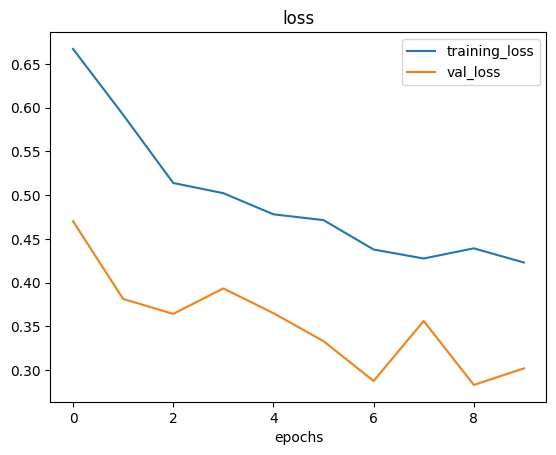

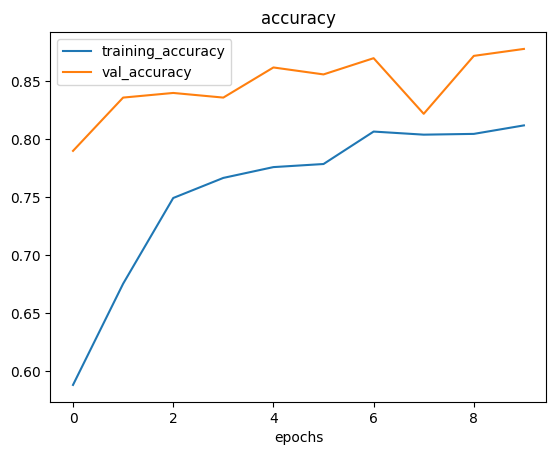

In [31]:
plot_loss_curves(history_2)

In [32]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 50)      1400      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 50)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 50)      22550     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 50)        22550     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 50)       

In [33]:
model_3 = Sequential([
    Conv2D(100, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(100, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(100, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(100, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(100, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history_3 = model_3.fit(train_data_augmented,
                       epochs=10,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 176s 4s/step - loss: 0.6504 - accuracy: 0.6147 - val_loss: 0.4526 - val_accuracy: 0.8000
Epoch 2/10
47/47 [==============================] - 150s 3s/step - loss: 0.5393 - accuracy: 0.7320 - val_loss: 0.3546 - val_accuracy: 0.8600
Epoch 3/10
47/47 [==============================] - 149s 3s/step - loss: 0.4878 - accuracy: 0.7847 - val_loss: 0.3843 - val_accuracy: 0.8180
Epoch 4/10
47/47 [==============================] - 150s 3s/step - loss: 0.4570 - accuracy: 0.7967 - val_loss: 0.3233 - val_accuracy: 0.8700
Epoch 5/10
47/47 [==============================] - 150s 3s/step - loss: 0.4605 - accuracy: 0.7993 - val_loss: 0.3513 - val_accuracy: 0.8520
Epoch 6/10
47/47 [==============================] - 131s 3s/step - loss: 0.4428 - accuracy: 0.8047 - val_loss: 0.3183 - val_accuracy: 0.8740
Epoch 7/10
47/47 [==============================] - 128s 3s/step - loss: 0.4424 - accuracy: 0.8120 - val_loss: 0.2817 - val_accuracy: 0.8780
Epoch 8/10
47

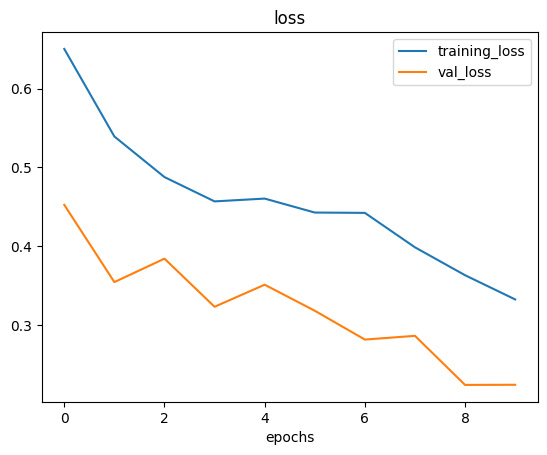

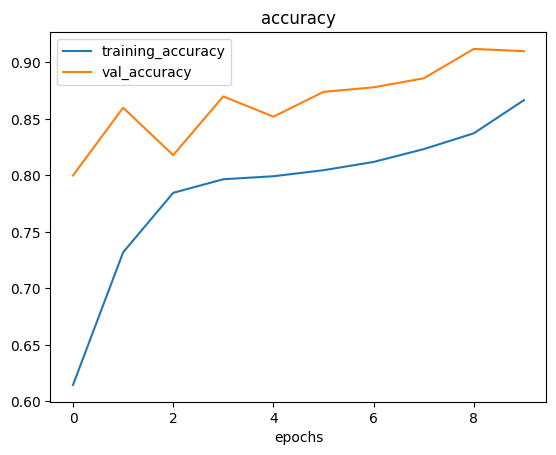

In [34]:
plot_loss_curves(history_3)

In [35]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 100)     0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 100)     90100     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 100)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 100)       90100     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 100)      

### Making prediction with our trained model on our own custom data

In [36]:
print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

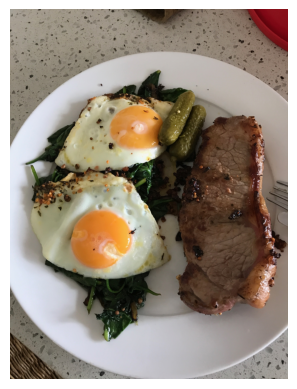

In [37]:
import matplotlib.image as mpimg
steak = mpimg.imread('../CNN/Custom_data/03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [38]:
steak.shape

(4032, 3024, 3)

In [39]:
#create a function to import and resize it to be able to be used with our model
def load_prep_image(filename, img_shape=224):
    """
    Reads an image from filename and turn it into a tensor and reshapes
    it to (img_shape, img_shape, color_channels).
    """
    #Read in the image
    img = tf.io.read_file(filename)
    #Decode the read file into a tensor
    img = tf.image.decode_image(img)
    #Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    #Rescale the image and get all the values between 0 and 1
    img = img/255
    return img

In [40]:
#Load in and preprocess our custom image
steak = load_prep_image('../CNN/Custom_data/03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [41]:
pred = model_3.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 215ms/step


array([[0.92036587]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visuslize the image as well as the model's prediction?

In [42]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [43]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [44]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """
    #Import the target image and preprocess it
    img = load_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    #Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 44ms/step


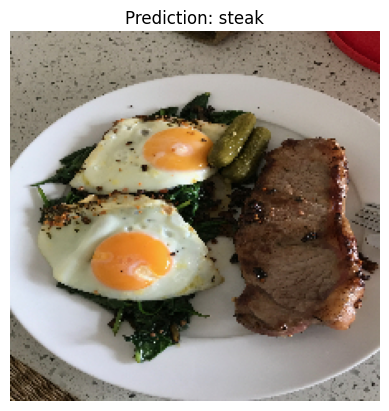

In [45]:
# Test our model on custom image
pred_and_plot(model_3, '../CNN/Custom_data/03-steak.jpeg')

1/1 [==============================] - 0s 42ms/step


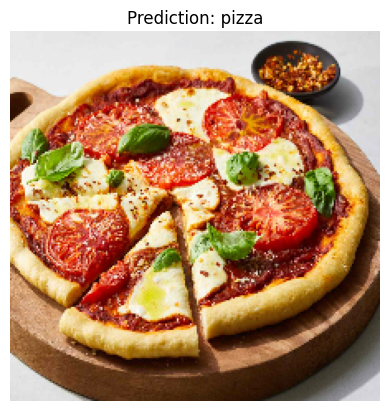

In [46]:
pred_and_plot(model_3, '../CNN/Custom_data/Pizza.jpg')